# Bank Personal Loan - Naive Bayes

# Import Libraries

In [1]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.patches import ConnectionPatch

# Naive Baise
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB


from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
!pip install zipcodes
import zipcodes as zcode

In [2]:
# read dataset and put it in DataFrame
df = pd.read_excel('Bank_PersonalLoan.xlsx','Data')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


1. ID: Customer ID
2. Age: Customer’s age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code: Home Address ZIP code.
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities_Account: Does the customer have securities account with the bank?
12. CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Do customers use internet banking facilities?
14. CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# EDA & Preproccessing

In [3]:
# Check For Missing Values
info = pd.DataFrame()
info.insert(0,"Data Type",df.dtypes ,True)
info.insert(1,"Column Real Name",df.columns,True)
info.insert(2,"IsNull",df.isnull().sum(),True)
info.insert(3,"IsNa",df.isna().sum(),True)
info.insert(4,"Unique",df.nunique(),True)
info.insert(5,"Duplicate Values",df.duplicated().sum(),True)
info.insert(6,"Min",df.min(),True)
info.insert(7,"Max",df.max(),True)
info.transpose().T  

,Data Type,Column Real Name,IsNull,IsNa,Unique,Duplicate Values,Min,Max
ID,int64,ID,0,0,5000,0,1.0,5000.0
Age,int64,Age,0,0,45,0,23.0,67.0
Experience,int64,Experience,0,0,47,0,-3.0,43.0
Income,int64,Income,0,0,162,0,8.0,224.0
ZIP Code,int64,ZIP Code,0,0,467,0,9307.0,96651.0
Family,int64,Family,0,0,4,0,1.0,4.0
CCAvg,float64,CCAvg,0,0,108,0,0.0,10.0
Education,int64,Education,0,0,3,0,1.0,3.0
Mortgage,int64,Mortgage,0,0,347,0,0.0,635.0
Personal Loan,int64,Personal Loan,0,0,2,0,0.0,1.0


## Conclusion
1. there is no null or empty values .
2. People Age is in Range 23 to 67.
3. the minimum of Experience column is -3 which is not true Cause Experice must be positive number. Must Be Fixed.
4. the CCAg Column format was inccorect for exmaple the first one  1/60 change to 1.60 . i correct all with notPad++.
5. maximum exprience is 43 years.
6. there is no Duplicate values
7. in Personal Loan,Securities Account,CD Account,Online,CreditCard columns Unique values are 0 and 1 so don't need Any Changes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data= df.copy()

As seen in the last step, the dataset contains negative values for Experience. Considering that the values of this feature indicate work experience in years, these negative values are considered noise

In [6]:
# show number of Experience < 0
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Since the number of these noise values in the Experience feature is small, we assume that these values are incorrectly recorded as negative and replace them with their absolute value:



In [7]:
# Convert Experience < 0 to positive number
data.loc[data['Experience']<0,'Experience']=np.abs(data['Experience'])

As can be seen, ID has a uniform distribution. Values of ID are all unique and actually ID acts as an identifier and lacks valuable information for the model. So, we remove this feature:

In [8]:
data.drop(columns=["ID"],inplace=True)

# Visualizaion Analize

In [9]:
def Show_Chart(name):
  
    fig , ax = plt.subplots(1,2,figsize=(17,7))
    
    X = data[name].value_counts().index.sort_values()
     
    if(len(X)<=2):
#         bar=sns.histplot(data, x=data[name], hue=data["Personal Loan"])
        sns.countplot(data[name],ax=ax[0])
        ax[0].bar_label(ax[0].containers[0])

    else:# show Barplot
        yes = []
        no = []
        
        for i in range(len(X)):
            #calculate persons who get loan
            yes.append(len(data[(data[name] ==i+1) & (data["Personal Loan"]==1)]))
            no.append( len(data[(data[name] ==i+1) & (data["Personal Loan"]==0)]))
            width = 0.35  # the width of the bars

        rects1 = ax[0].bar(X - width/2, yes, width, label='1')
        ax[0].bar_label(ax[0].containers[0])
      
        rects2 = ax[0].bar(X + width/2, no, width, label='0')
        ax[0].bar_label(ax[0].containers[1])
        ax[0].set_xticks(np.arange(1,len(X)+1), X) 
        ax[0].legend()
            
    
    
    
    
    ax[1]= plt.pie(data[name].value_counts().values * 100/len(data[name]),labels=data[name].value_counts().index,autopct='%1.1f%%')
    fig.suptitle(f'Distribution Of {name}', fontsize=24)
    plt.legend()
    plt.show()

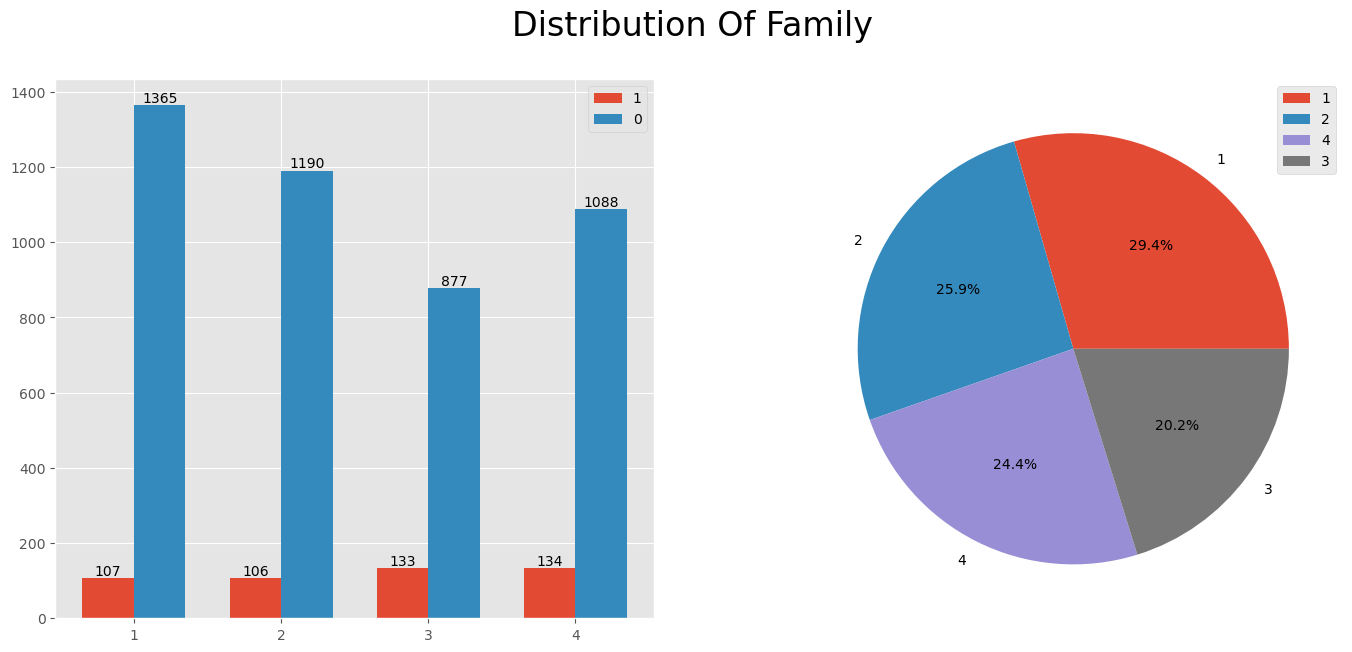

In [10]:
Show_Chart("Family")

1. More number of customer are single
2. customer with family size 3 or 4 have more chance to get loan 

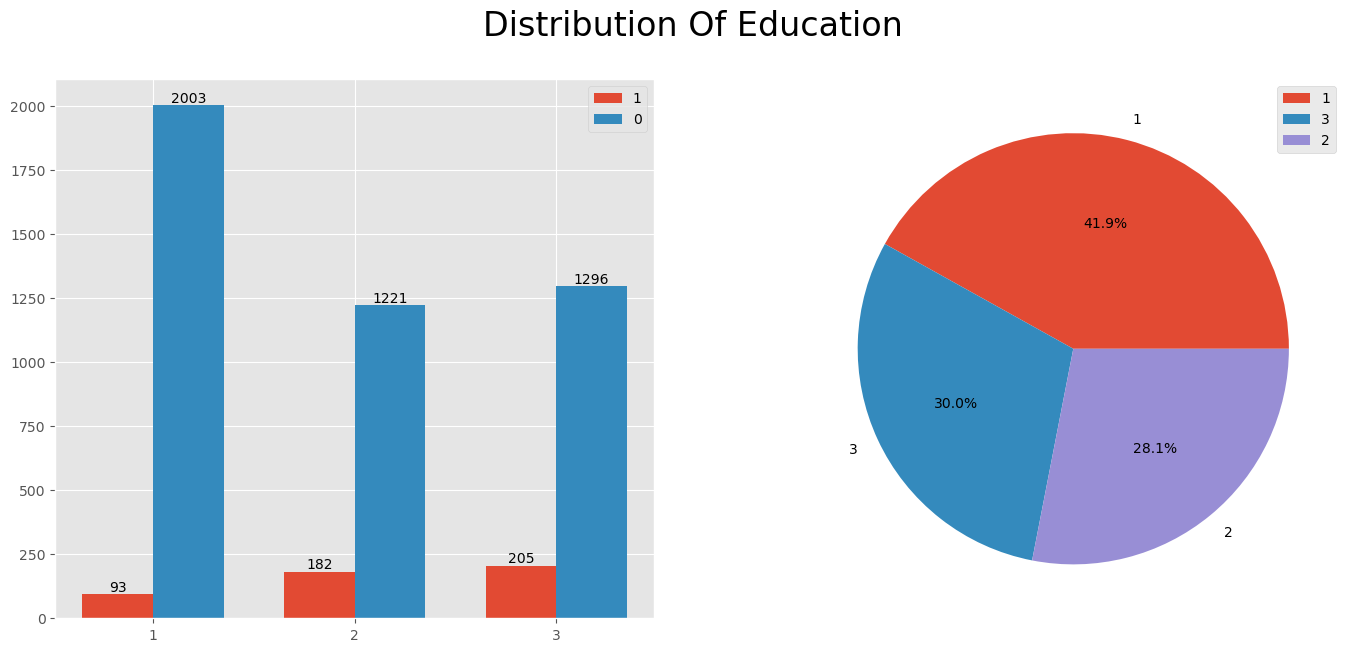

In [11]:
Show_Chart("Education")

1. More number of customer have level 1 edication 
2. by locking at the chart we can say with higher education level customers have more chance to get loan

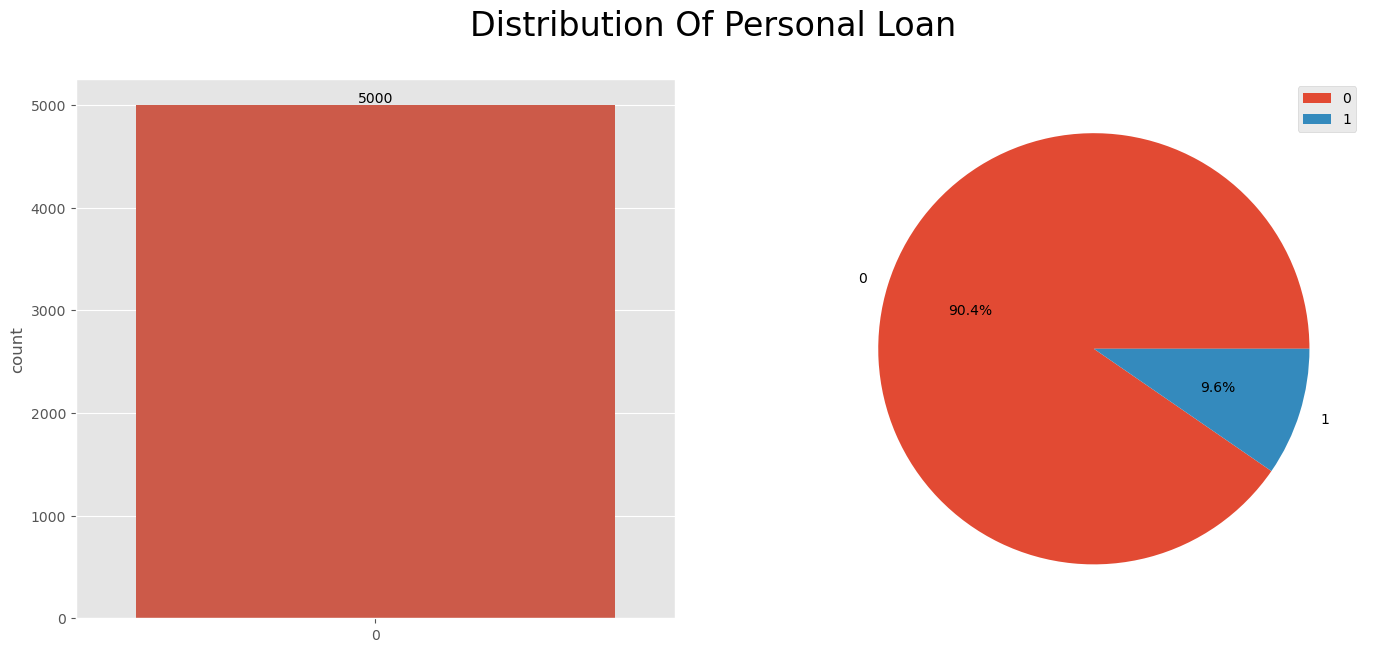

In [12]:
Show_Chart("Personal Loan")

from all persons in this review only 9.6 % get loan

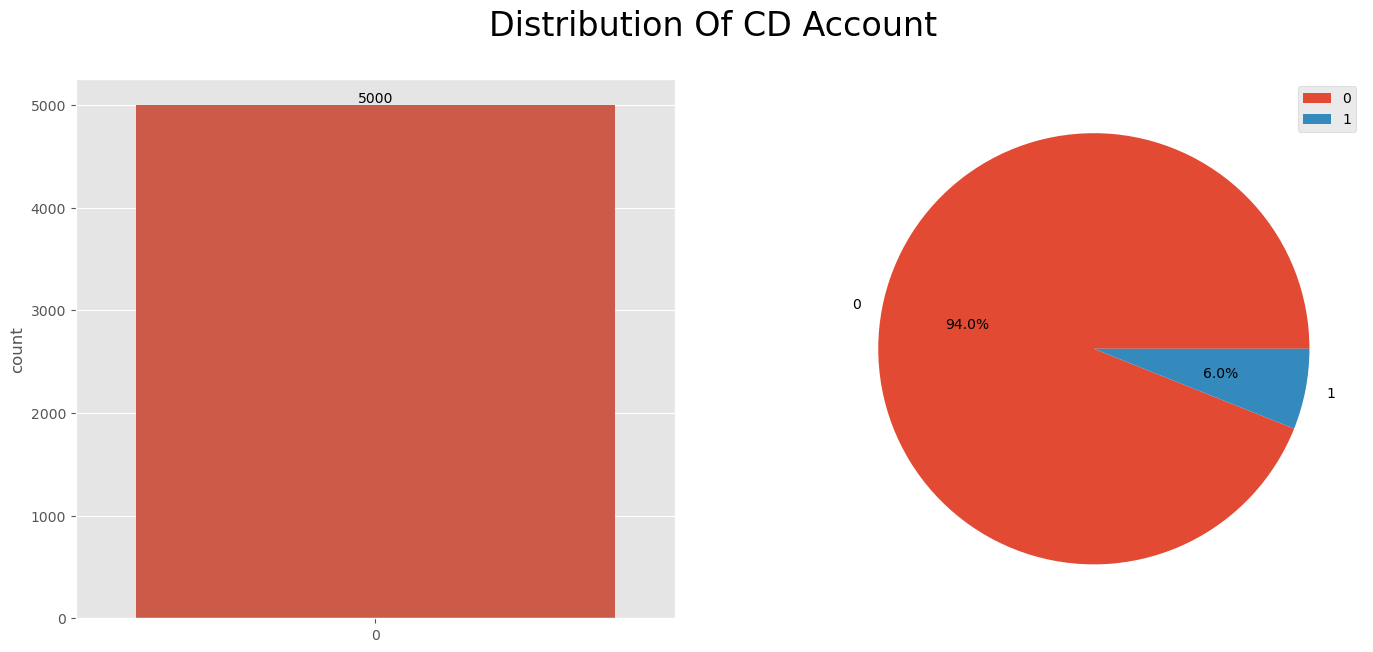

In [13]:
Show_Chart("CD Account")

most of the customers dosen't have CD Account

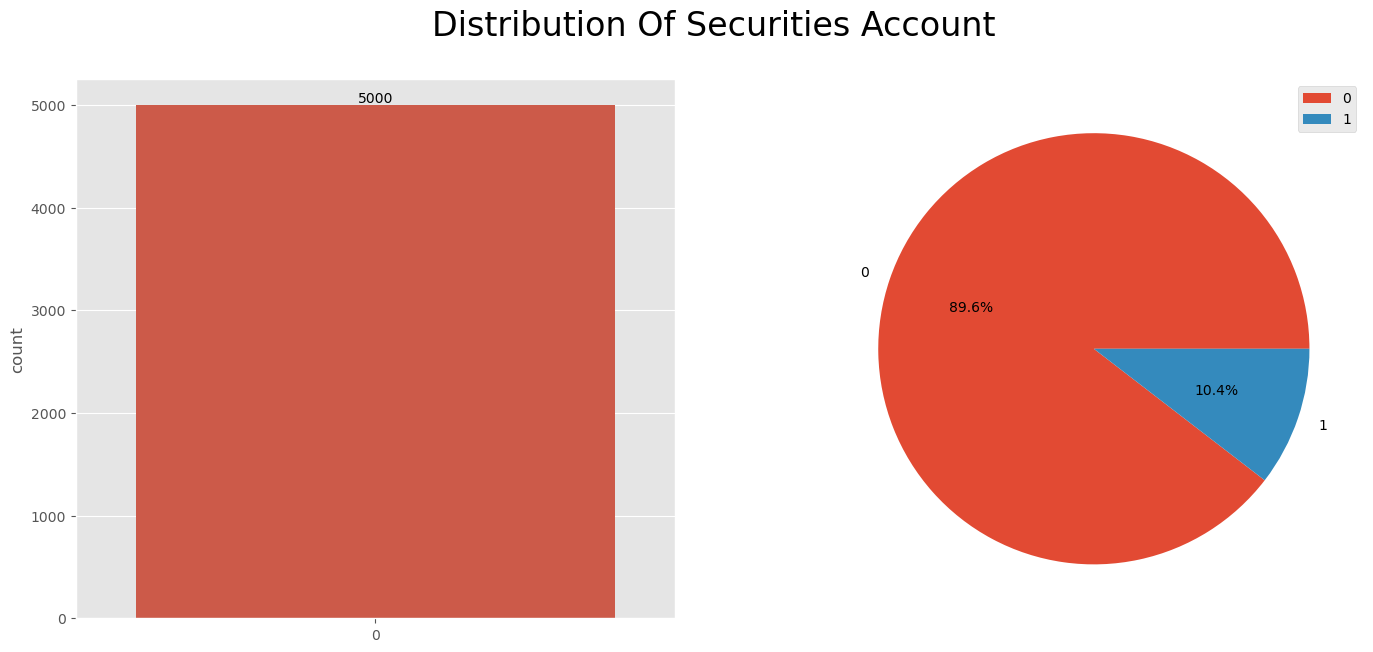

In [14]:
Show_Chart("Securities Account")

most of the customers daosen't have Securities Account

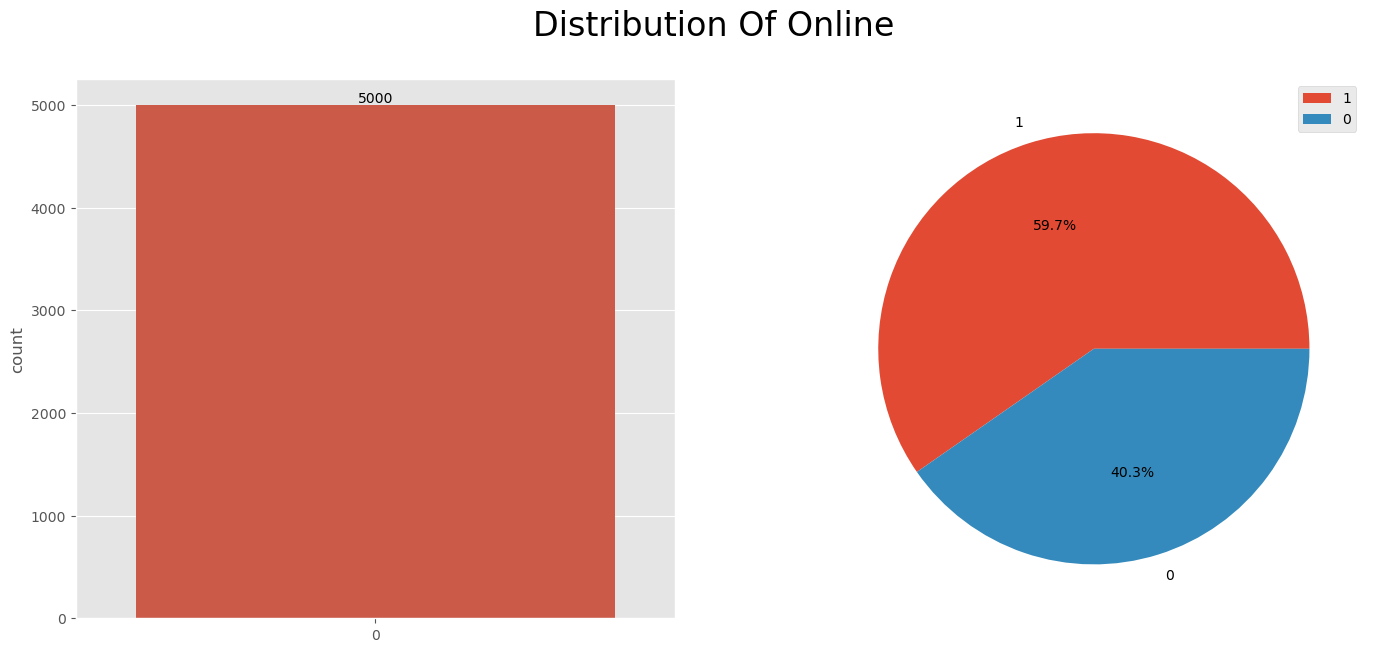

In [15]:
Show_Chart("Online")

More number of customer use online banking.

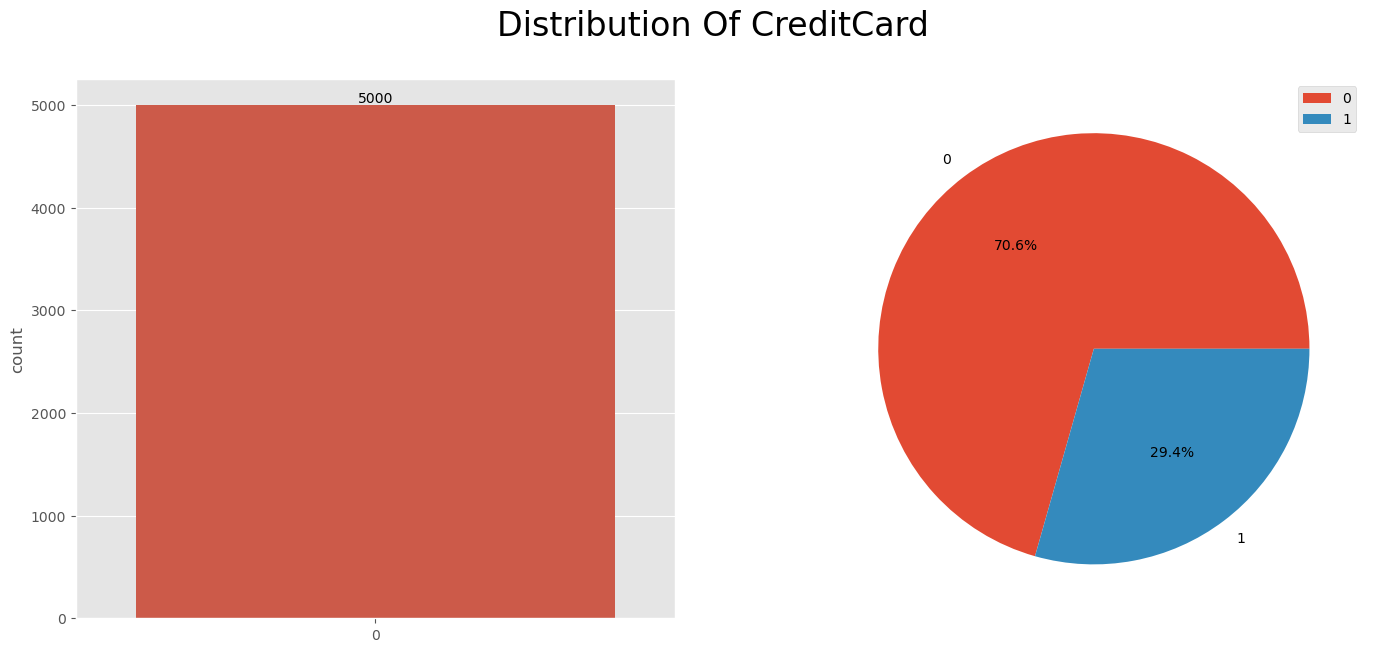

In [16]:
Show_Chart("CreditCard")

most of the customers dosen't have creadit Card

Income is a strong attribute which effect the chances of having Personl Loan High the Income High the chances of having Personal Loan. So we will analysise Income with other attributes

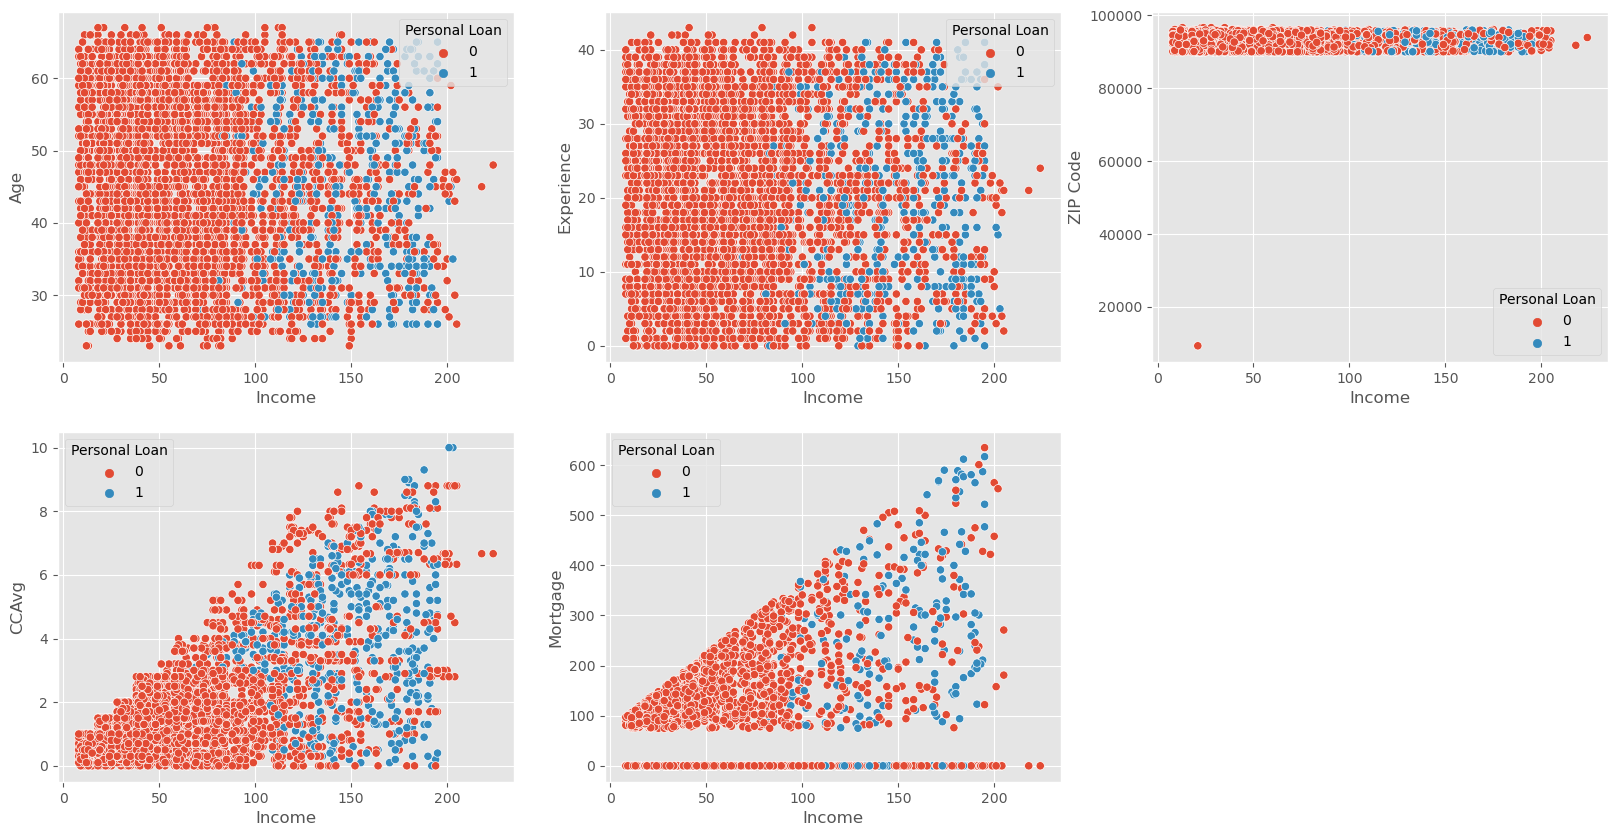

In [17]:
cols = ["Age","Experience","ZIP Code","CCAvg","Mortgage"]
fig=plt.figure(figsize=(20,10))
for col in range(len(cols)):
    ax=fig.add_subplot(2,3,col+1)
    sns.scatterplot(x='Income',y=cols[col],hue='Personal Loan',data=data)

1. as you can see Age And Experience is not effetive parameter for Get loan.
2. Customers with high Income (peroximitly more than 80 ) And high CCAvg (peroximitly more than 80) have more Chance to get loan.
3. zip codes show that customers are from paricular area.

### Processing Zipcode

as see earlier dataset has 467 unique zipcode .lets turn them to name and see is there any pattern 

In [18]:
zipcodes = data["ZIP Code"].unique()

In [19]:
dict_zip={}
for zipcode in zipcodes:
    Name = zcode.matching(zipcode.astype('str'))
    if len(Name)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=Name[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

#### 4 zipcode doesnt have any name so i search in internt and if have any name change it.
1. 92717   : Santa Ana - California - Orange County
2. 9307    : Not Found 
3. 92634   : Irvine - California - Orange County
4. 96651   : Lotus - California - El Dorado County

In [20]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92717:'Orange County'})
dict_zip.update({96651:'El Dorado County'})


In [21]:
data1 = data.copy()
data1['County']=data1['ZIP Code'].map(dict_zip)

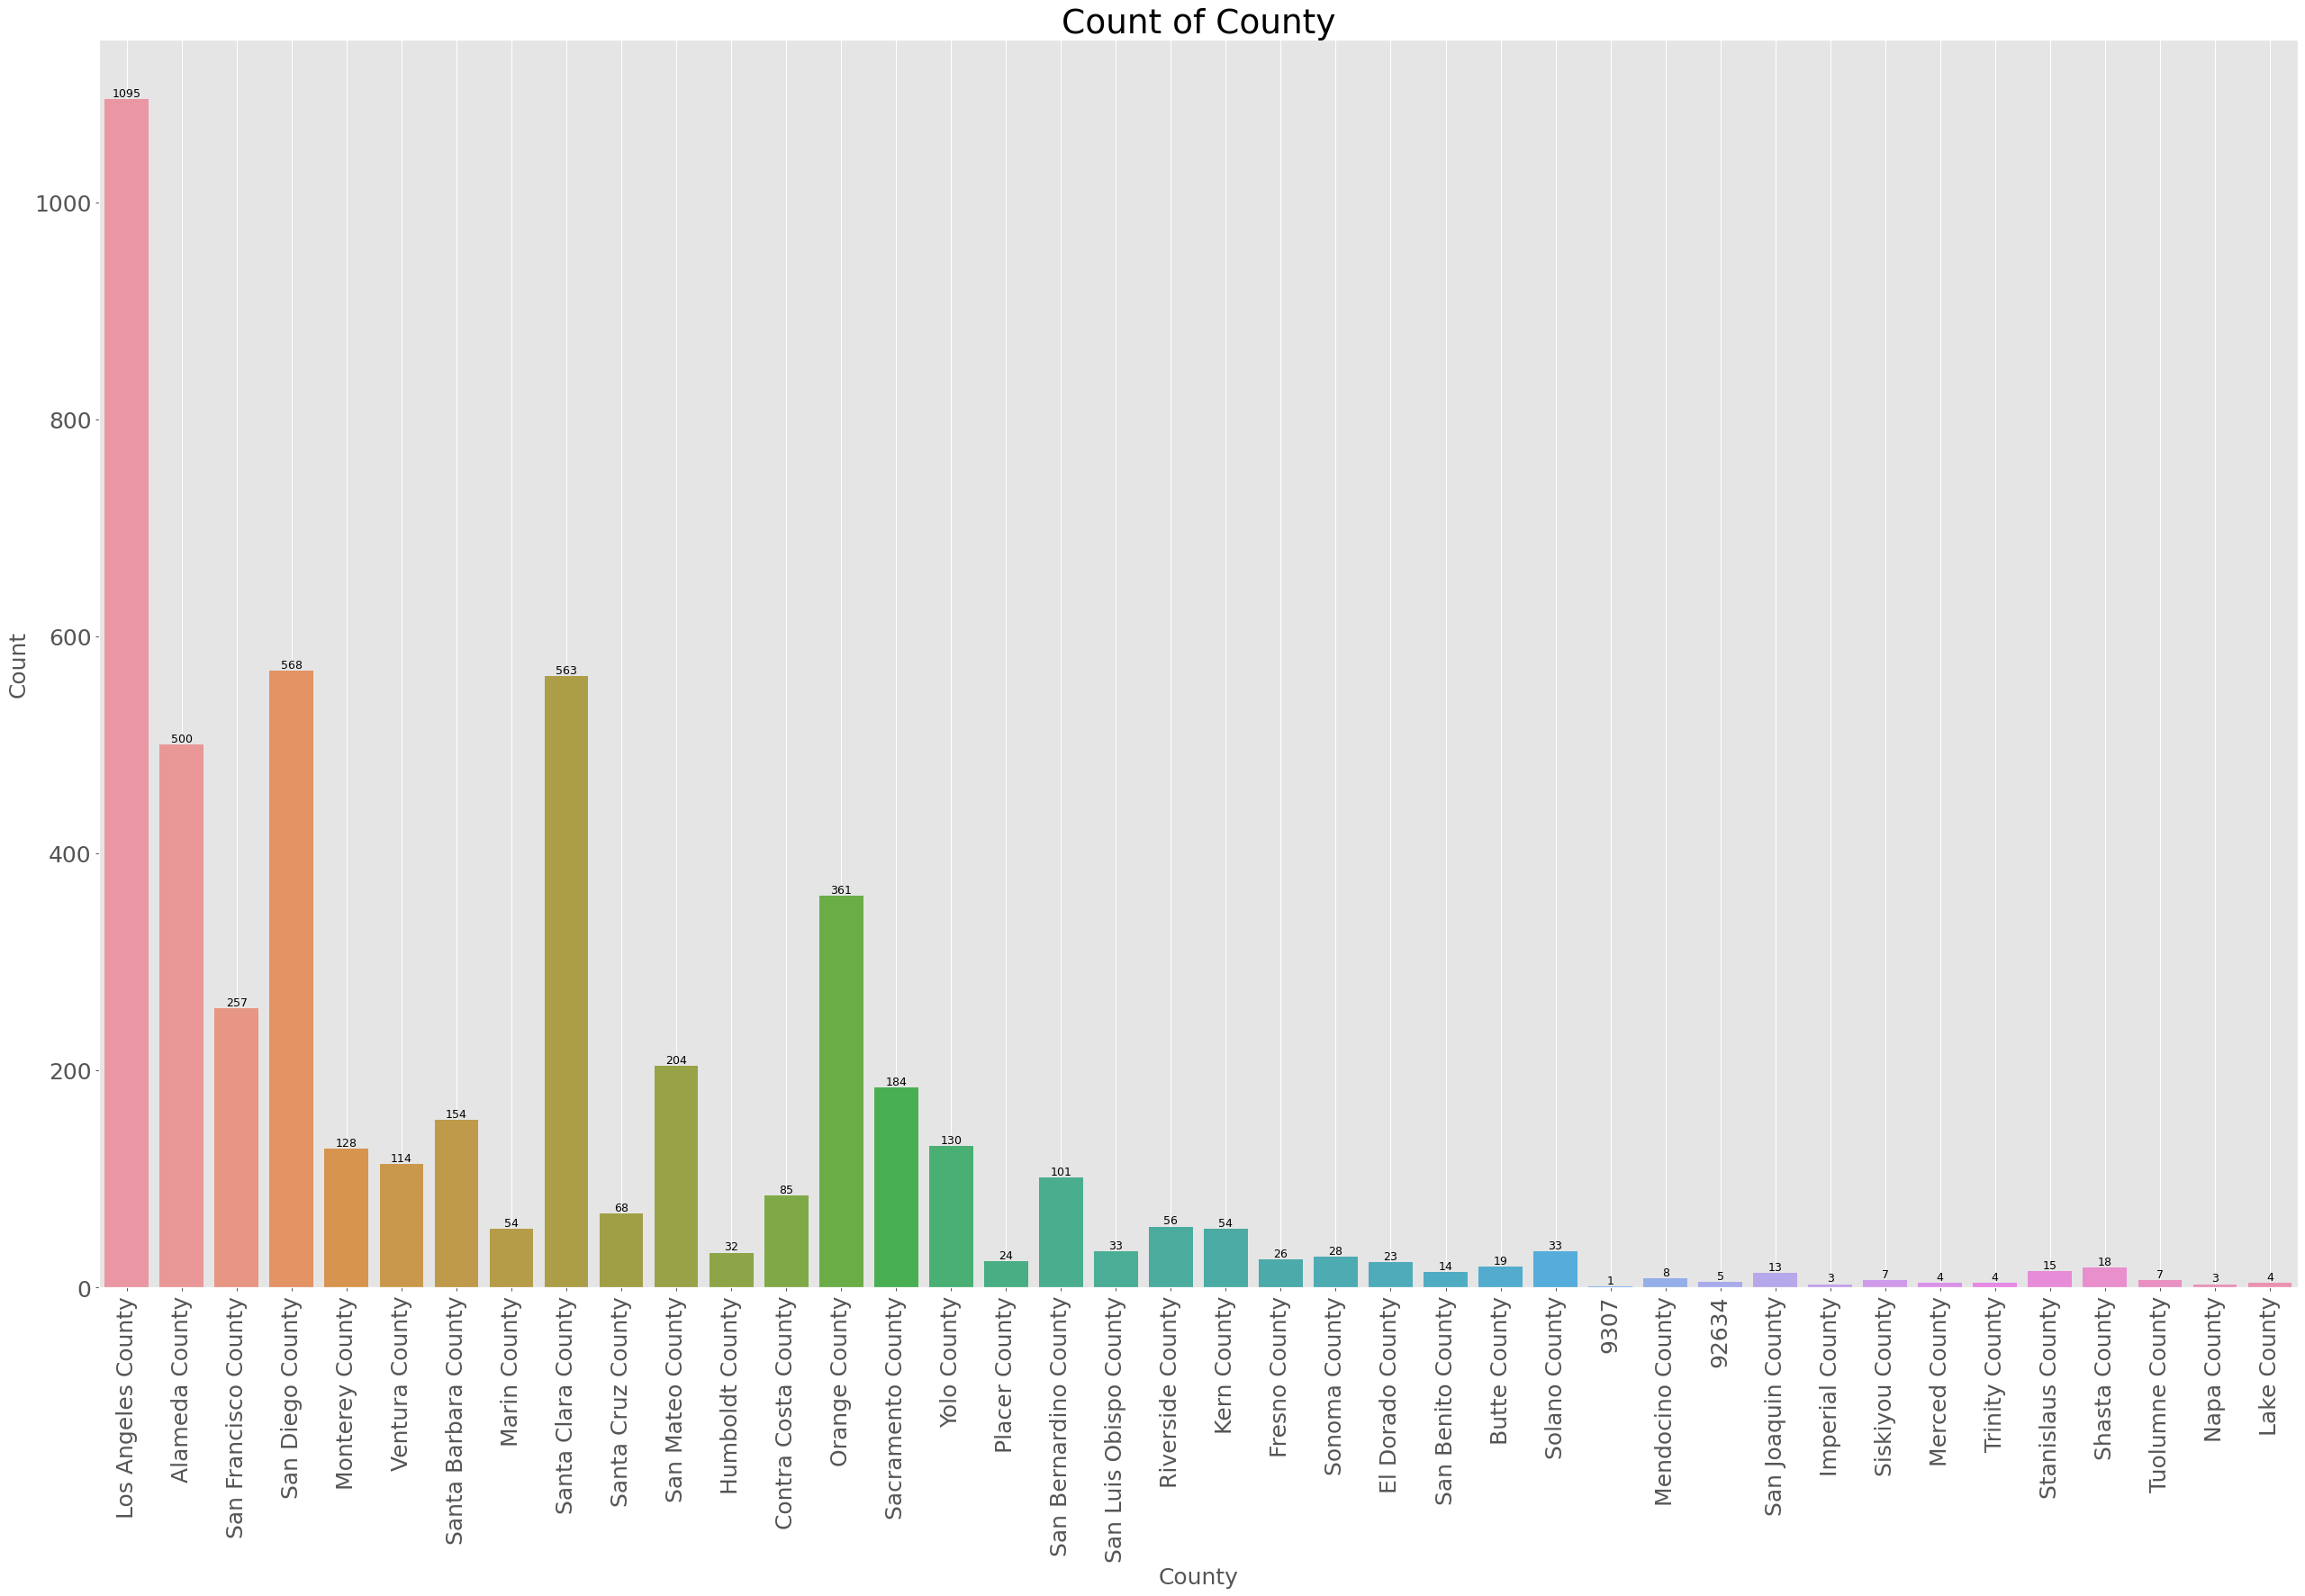

In [22]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot(x="County",data=data1)
plt.xticks(rotation =90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("County",fontsize=20)
plt.ylabel("Count",fontsize=20)
ax.bar_label(ax.containers[0])
plt.title("Count of County",fontsize=30)
plt.grid()

most of the Customers are from Los Angles County 

# Correlation Analysis

Text(220.72222222222223, 0.5, 'Features')

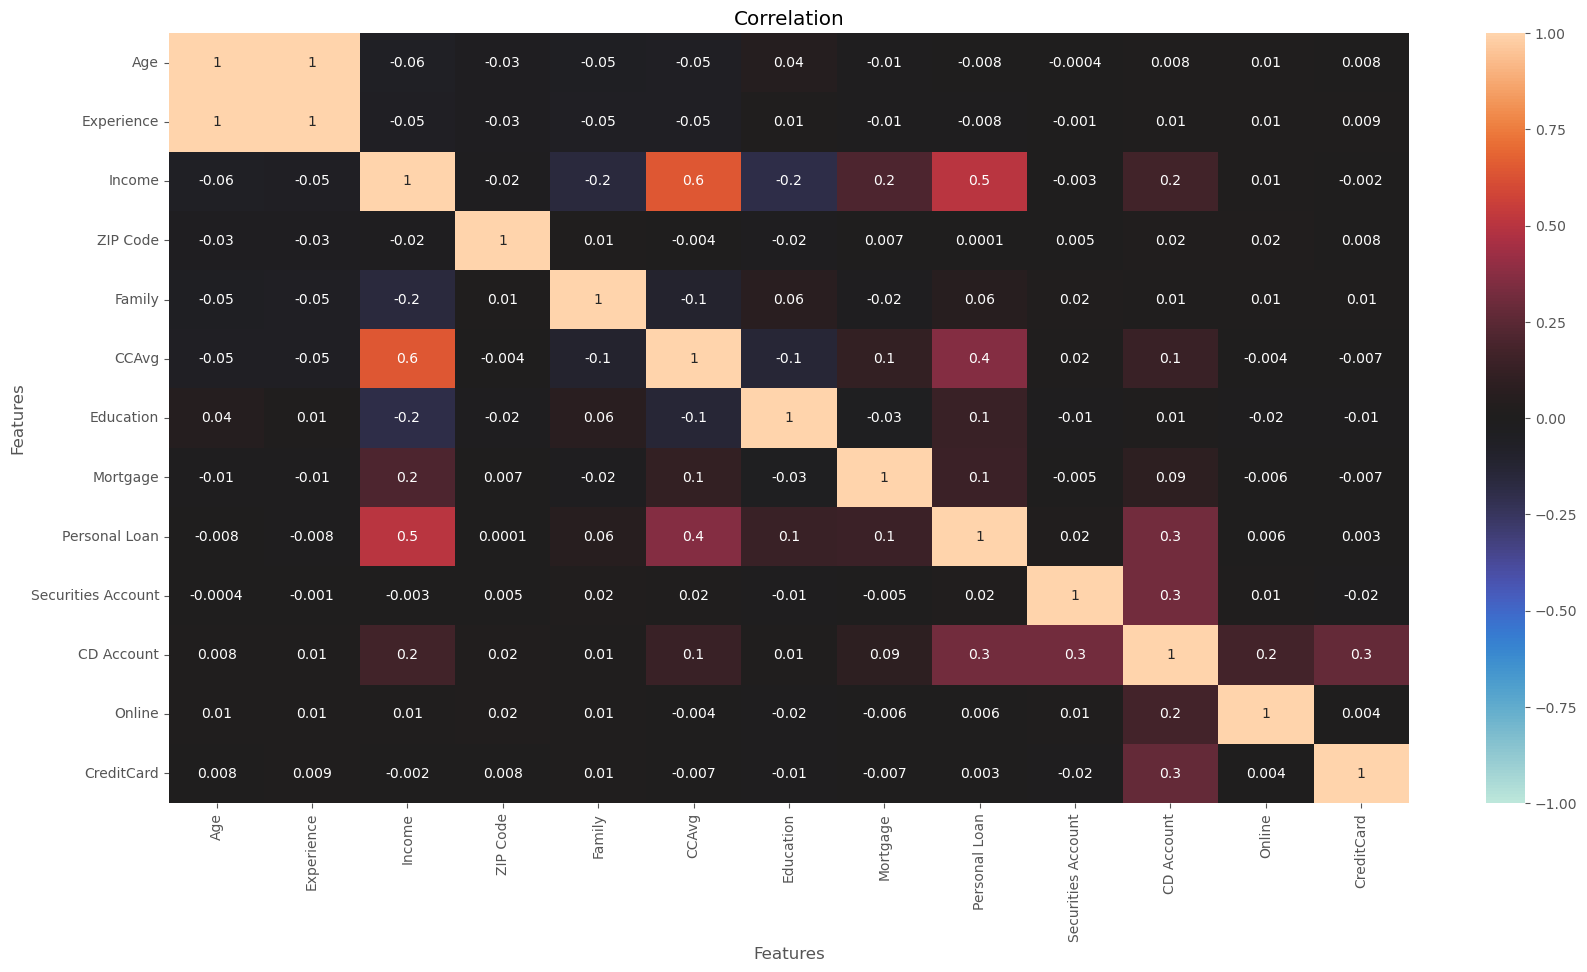

In [23]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.heatmap(data.corr(), annot = True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

Conclusion:
 * Personal Loan is highly correlated with Income, CD_Account, CCAvg.
 * Experience is highly correlated with Age. (ρ = 1)
 * CCAvg is correlated with Income to a good extent. (ρ = 0.6)


Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models. We drop Experience feature from both train_X and test_X.

In [24]:
data.drop("Experience", axis=1, inplace=True)
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


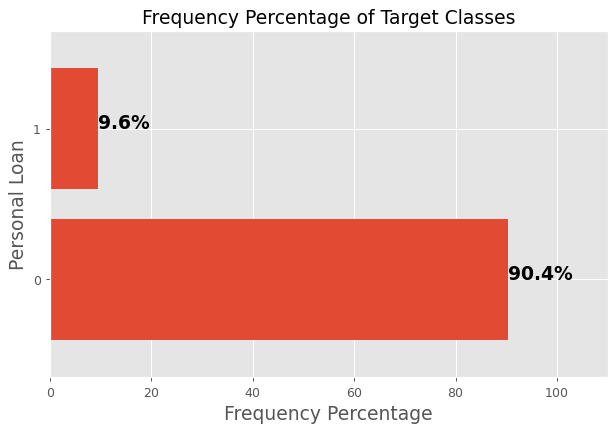

In [25]:
plt.figure(figsize=(35,20),dpi=90)
# Plot frequency percentages barplot
data['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = data['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

As can be seen, the dataset we are working on is imbalanced.


# Naive Bays Model

Naive Bayes is a classification algorithm in machine learning. It is used to predict the probability of a given input belonging to different classes or categories. It is based on Bayes' theorem, which uses the prior probability of the class and the likelihood of the features given the class to calculate the posterior probability of the class. The class with the highest posterior probability is then chosen as the predicted class for the input. The Naive Bayes classifier algorithm makes several assumptions about the data and the problem it is being used to solve.


Different types of Naive Bayes algorithms available in sklearn:
* Gaussian Naive Bayes: This algorithm is used when the data is continuous and follows a normal distribution.

* Multinomial Naive Bayes: This algorithm is used when the data is discrete and represents the count of occurrences of each category.

* Bernoulli Naive Bayes: This algorithm is similar to the multinomial Naive Bayes, but it is used when the data is binary.

* Complement Naive Bayes: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for imbalanced data sets.

* Categorical Naive Bayes: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for categorical data, rather than count data.

In this project, the main goal is to classify potential customers who are more likely to purchase a loan. The metrics used to evaluate the performance of the model will be important in determining how well the model is able to identify these potential customers.

* Recall is a measure of the proportion of actual positive cases that were correctly identified by the model. A high recall score means that the model has a low number of false negatives, which is desirable in this project because it means that the model is not missing many potential loan customers.

* Precision is a measure of the proportion of positive cases identified by the model that are actually positive. A high precision score means that the model has a low number of false positives, which is desirable in this project because it means that the model is not identifying many non-loan customers as potential loan customers.

* F1-score is a measure of the trade-off between recall and precision. It is calculated as the harmonic mean of recall and precision. A high F1-score indicates a balance between high recall and high precision.

For this project, both recall and precision for class '1' are important metrics, so f1-score for class '1' should be considered as the most important metric. A high f1-score indicates a balance between identifying as many potential loan customers as possible (high recall) and minimizing the number of false positives (high precision). This is important for the bank, as it wants to increase the conversion rate of depositors to borrowers while reducing the cost of the marketing campaign.

In [26]:
# split Data
X = data.drop(columns={"Personal Loan","ZIP Code"},axis=1)
y =data["Personal Loan"].values.reshape(-1,1) #target

The approach to train test split when dealing with imbalanced datasets is to use stratification. Stratification is an important step in splitting imbalanced datasets into training and test sets. Stratification ensures that the proportion of each class remains the same across both the training and test sets. This is important as it allows for a more accurate evaluation of the model, avoiding bias due to a disproportion of one class being over-represented in either dataset. Stratified sampling also ensures that any trends or correlations among different classes that exist within the overall dataset are preserved after splitting into training and test datasets:

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41,stratify=y)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 10)
y_train shape: (4000, 1)
X_test shape: (1000, 10)
y_test shape: (1000, 1)


## Gussian Navie Bayes

In [28]:
GussianClassifier = GaussianNB()
GussianClassifier.fit(X_train,y_train)
y_pred=GussianClassifier.predict(X_test)
print("===================================> Result <===================================")
print("Accuracy                     = " ,metrics.accuracy_score(y_test,y_pred))
print("F1 Score                     = " ,metrics.f1_score(y_test,y_pred))

===================================> Result <===================================
Accuracy                     =  0.883
F1 Score                     =  0.4890829694323144


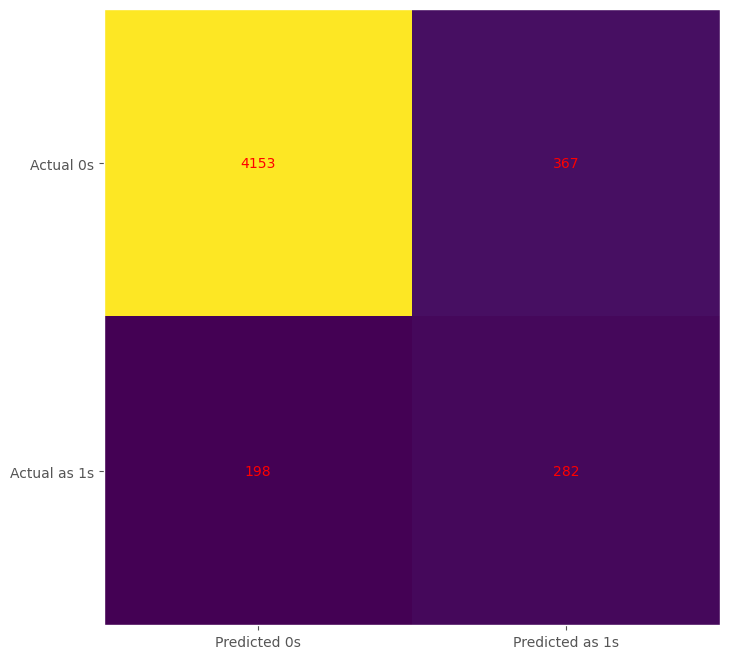

In [29]:
cm = confusion_matrix(y,GussianClassifier.predict(X))

fig , ax  = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted 0s","Predicted as 1s"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual 0s","Actual as 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha="center",va="center",color = "red")

In [30]:
print(classification_report(y,GussianClassifier.predict(X)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4520
           1       0.43      0.59      0.50       480

    accuracy                           0.89      5000
   macro avg       0.69      0.75      0.72      5000
weighted avg       0.90      0.89      0.89      5000



### Multinomial  Navie Bayes

In [31]:
MultinomialClassifier = MultinomialNB()
MultinomialClassifier.fit(X_train,y_train)
y_pred=MultinomialClassifier.predict(X_test)
print("===================================> Result <===================================")
print("Accuracy                     = " ,metrics.accuracy_score(y_test,y_pred))
print("F1 Score                     = " ,metrics.f1_score(y_test,y_pred))

===================================> Result <===================================
Accuracy                     =  0.804
F1 Score                     =  0.40963855421686746


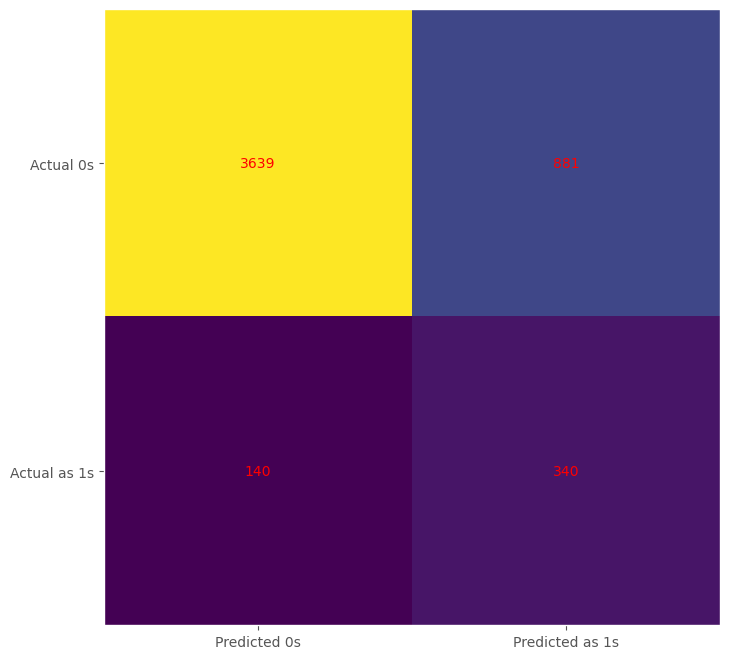

In [32]:
cm = confusion_matrix(y,MultinomialClassifier.predict(X))

fig , ax  = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted 0s","Predicted as 1s"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual 0s","Actual as 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha="center",va="center",color = "red")

In [33]:
print(classification_report(y,MultinomialClassifier.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      4520
           1       0.28      0.71      0.40       480

    accuracy                           0.80      5000
   macro avg       0.62      0.76      0.64      5000
weighted avg       0.90      0.80      0.83      5000



### Complement  Navie Bayes

In [34]:
ComplementClassifier = ComplementNB()
ComplementClassifier.fit(X_train,y_train)
y_pred=ComplementClassifier.predict(X_test)
print("===================================> Result <===================================")
print("Accuracy                     = " ,metrics.accuracy_score(y_test,y_pred))
print("F1 Score                     = " ,metrics.f1_score(y_test,y_pred))

===================================> Result <===================================
Accuracy                     =  0.772
F1 Score                     =  0.3837837837837838


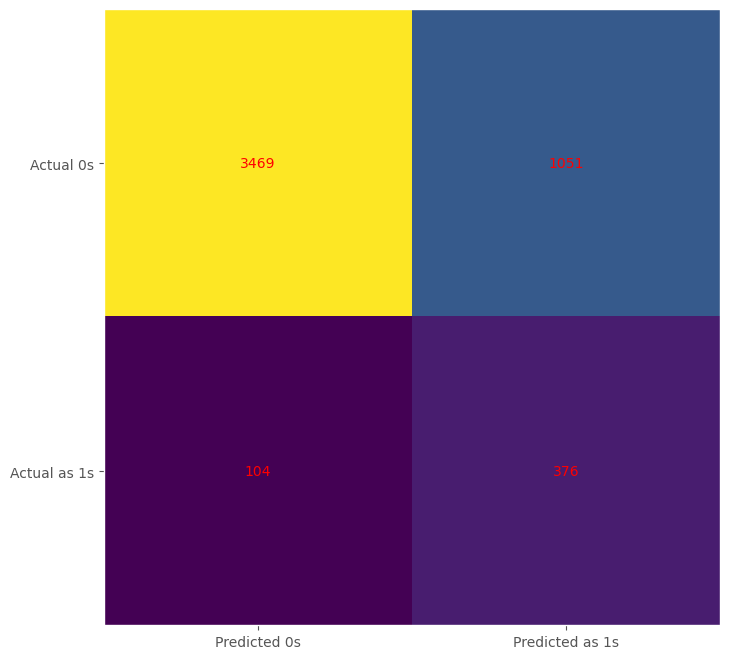

In [35]:
cm = confusion_matrix(y,ComplementClassifier.predict(X))

fig , ax  = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted 0s","Predicted as 1s"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual 0s","Actual as 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha="center",va="center",color = "red")

In [36]:
print(classification_report(y,ComplementClassifier.predict(X)))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      4520
           1       0.26      0.78      0.39       480

    accuracy                           0.77      5000
   macro avg       0.62      0.78      0.63      5000
weighted avg       0.90      0.77      0.81      5000



### Bernoulli Navie Bayes

In [37]:
BernoulliClassifier = BernoulliNB()
BernoulliClassifier.fit(X_train,y_train)
y_pred=BernoulliClassifier.predict(X_test)
print("===================================> Result <===================================")
print("Accuracy                     = " ,metrics.accuracy_score(y_test,y_pred))
print("F1 Score                     = " ,metrics.f1_score(y_test,y_pred))

===================================> Result <===================================
Accuracy                     =  0.904
F1 Score                     =  0.0


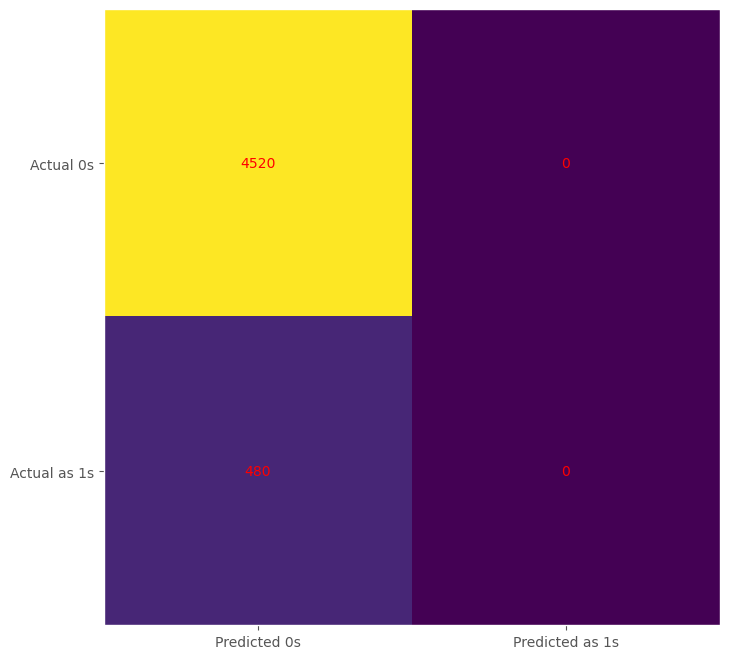

In [38]:
cm = confusion_matrix(y,BernoulliClassifier.predict(X))

fig , ax  = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("Predicted 0s","Predicted as 1s"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual 0s","Actual as 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha="center",va="center",color = "red")

In [39]:
print(classification_report(y,BernoulliClassifier.predict(X)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4520
           1       0.00      0.00      0.00       480

    accuracy                           0.90      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.82      0.90      0.86      5000

